In [36]:
import numpy as np
import math
import matplotlib.pyplot as plt

# minimize: x^2 + y^2 + z^4  
#-100 < x,y,z <100

w = 1
w_damp = 0.998
c1 = 1.5
c2 = 1.5

lower_bound = np.array([-100, -100, -100])
upper_bound = np.array([100, 100, 100])

vel_max = 0.1 * (upper_bound-lower_bound)

class Particle:
    def __init__(self):
        self.dvar = np.random.random(3)*200 -100
        self.velocity = np.random.random(3)*200 -100
        self.personal_best = None
        self.fitness = None
        
    def calc_fitness(self):
        self.fitness = pow(self.dvar[0],2) + pow(self.dvar[1],2) + pow(self.dvar[2],2)

In [37]:
p1 = Particle()
p1.calc_fitness()
print(p1.dvar)
print(p1.fitness)

[  9.85963465 -99.88094425  68.38779192]
14750.305502223664


In [38]:
pop_size = 20
population = []
best_fit = math.inf
global_best = Particle()

for i in range(pop_size):
    population.append(Particle())
    population[i].calc_fitness()
    population[i].personal_best = Particle()
    population[i].personal_best.calc_fitness()
    if (population[i].fitness < best_fit):
        best_fit = population[i].fitness
        global_best = population[i]

print(best_fit)
print(global_best.dvar)

662.1306768022205
[ -4.17091614 -24.92034559  -4.86934401]


In [39]:
best = []
for it in range(50):
    # update position
    for i in range(pop_size):
        # population[i].dvar += population[i].velocity
        #update velocity
        population[i].velocity = w*population[i].velocity + c1*np.random.rand(3)*(population[i].personal_best.dvar - population[i].dvar) + c2*np.random.rand(3)*(global_best.dvar-population[i].dvar)
        #update velocity bound
        population[i].velocity = np.maximum(population[i].velocity, -vel_max)
        population[i].velocity = np.minimum(population[i].velocity, vel_max)
        #update dvar
        population[i].dvar += population[i].velocity
        # update dvar bound
        population[i].dvar = np.maximum(population[i].dvar, lower_bound)
        population[i].dvar = np.minimum(population[i].dvar, upper_bound)      
        # calc_fitness
        population[i].calc_fitness()  
        #update personal best
        if population[i].fitness < population[i].personal_best.fitness:
            population[i].personal_best = population[i]
        # update global best
        if population[i].fitness < global_best.fitness:
            global_best = population[i]
        #damp w
        w = w * w_damp
    print(global_best.dvar, " - ", global_best.fitness)
    best.append(global_best.fitness)


[ 15.82908386 -36.5484808   -4.30760649]  -  1604.9068181665032
[-10.27814633  -3.6452743   24.98467574]  -  743.1623382526876
[-4.44523195 -1.1570641  12.11453551]  -  167.86085491781452
[-15.78883921   7.93085414  -5.61798869]  -  343.7476879838748
[  0.84681153  -8.70479661 -11.85854838]  -  217.1157433803246
[-9.50903756 -5.27876656  4.99642029]  -  143.25138736204767
[ 1.68614862  5.41645576 -6.87071043]  -  79.38775208373329
[ 4.71975076 -1.56920261 -6.39919218]  -  65.68810470136246
[-3.76050762  4.70476464  3.51361727]  -  48.62173423960687
[-5.0727029  -3.63295647 -2.75115278]  -  46.499529070011825
[ 3.30098472 -0.4635265  -3.41286345]  -  22.758993871342277
[ 7.24860544 -1.75903611 -2.5011913 ]  -  61.892446847069685
[ 7.39116936 10.3655052  -5.28225644]  -  189.9753155751842
[-3.5432635  -1.90035064 -4.16921724]  -  33.54842118793181
[ 0.18126703 -1.67647747  0.77567665]  -  3.4451087029127723
[ 1.73125622  1.17917402 -0.8703906 ]  -  5.145279293928283
[ 1.00975829 -1.66763

(0.0, 50.0)

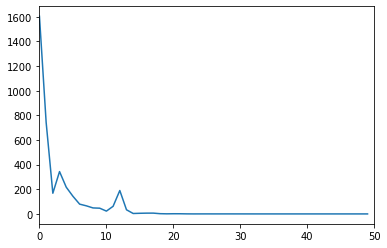

In [40]:
plt.plot(best)
plt.xlim((0, 50))

In [41]:
a = np.arange(0,5)
b = np.arange(3,8)

np.maximum(a,b)

array([3, 4, 5, 6, 7])